Лабораторная работа №6. Ионов Артем Юрьевич 6231-010402D

Построить графики из лабораторной 1 с помощью altair.


---



In [6]:
import kagglehub
import pandas as pd
import numpy as np
import altair as alt

In [3]:
path = kagglehub.dataset_download("ruiromanini/mtcars")
df = pd.read_csv(f"{path}/mtcars.csv")

100%|██████████| 999/999 [00:00<00:00, 2.04MB/s]

Extracting files...


In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


*1. Гистограмма распределения мощности (hp)*

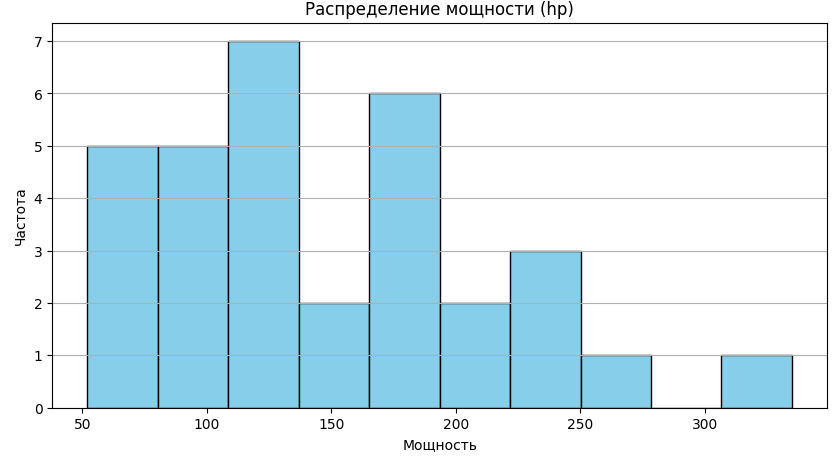

In [10]:
alt.Chart(df).mark_bar().encode(
    alt.X('hp:Q', bin=alt.Bin(maxbins=15), title='Мощность'),
    alt.Y('count():Q', title='Частота'),
    color=alt.value('skyblue'),
    stroke=alt.value('black')
).properties(
    title='Распределение мощности (hp)'
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

*2. Диаграмма рассеяния: мощность (hp) vs вес (wt)*

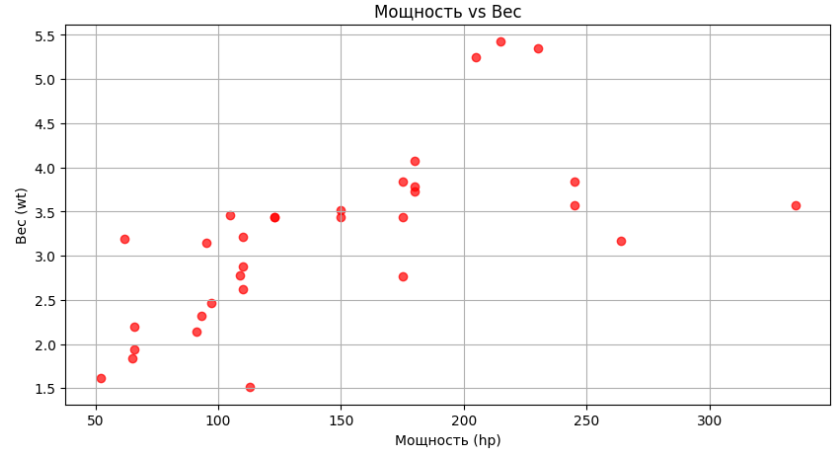

In [16]:
alt.Chart(df).mark_point(filled=True, color='red').encode(
    alt.X('hp:Q',title='Мощность'),
    alt.Y('wt:Q',title='Вес'),
).properties(
    title='Мощность vs Вес'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

*3. Линейный график зависимости мощности от числа цилиндров*

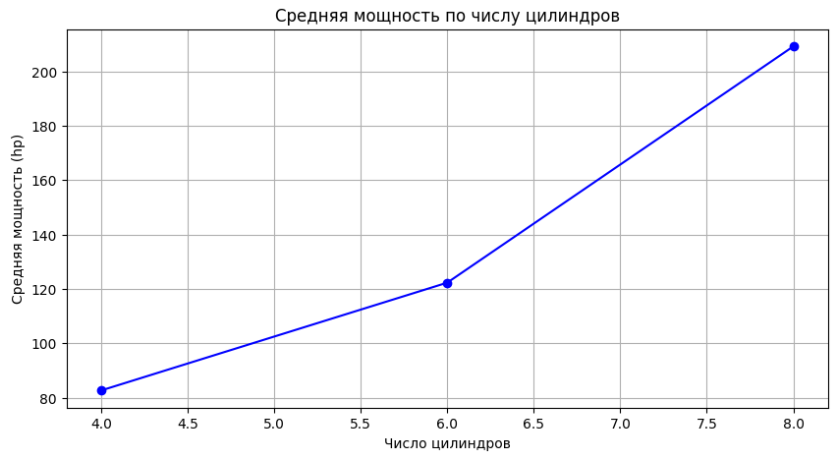

In [45]:
alt.Chart(df).encode(
    x=alt.X('cyl:O', title='Число цилиндров'),
    y=alt.Y('mean(hp):Q', title='Средняя мощность (hp)')
).mark_line(color='blue').properties(
    title='Средняя мощность по числу цилиндров',
    width=600,
    height=400
) + \
   alt.Chart(df).encode(
       x=alt.X('cyl:O'),
       y=alt.Y('mean(hp):Q')
   ).mark_point(color='blue')

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

*4. "Ящик с усами" для распределения расхода топлива (mpg) по числу цилиндров*

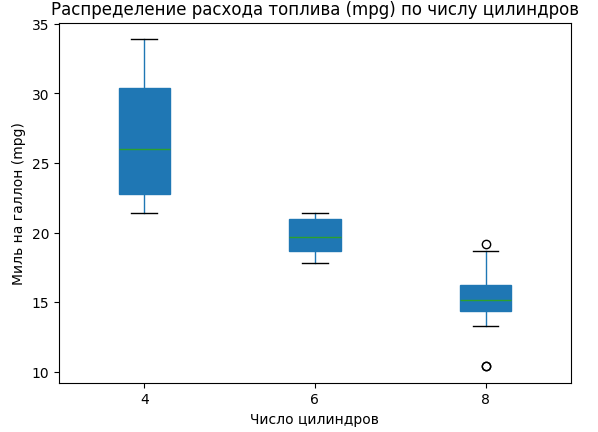

In [49]:
alt.Chart(df).mark_boxplot(
    color='blue'
).encode(
    x=alt.X('cyl:O', title='Число цилиндров'),
    y=alt.Y('mpg:Q', title='Миль на галлон (mpg)')
).properties(
    title='Распределение расхода топлива (mpg) по числу цилиндров',
    width=600,
    height=400
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

*5. Круговая диаграмма распределения числа машин по числу цилиндров*

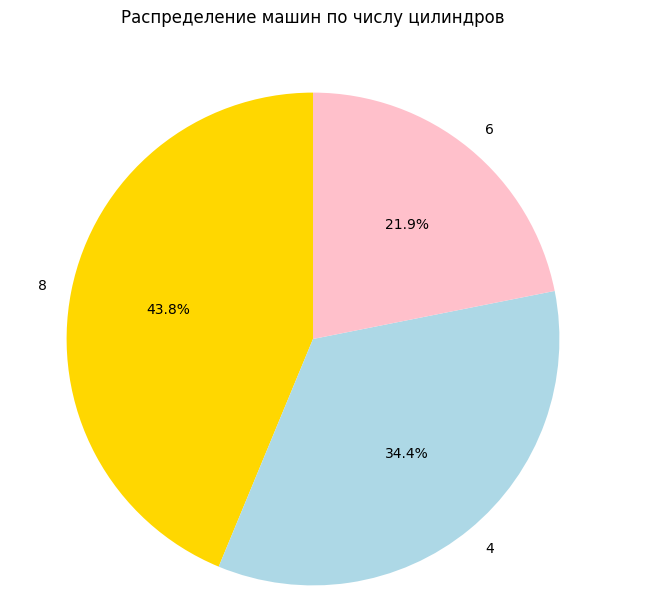

Я не смог сделать подписи адекватно поверх секторов, и решил сделать просто подсказку при наведении курсором на сектор

In [80]:
alt.Chart(df).mark_arc().encode(
    theta=alt.Theta('count():Q', stack=True),
    color=alt.Color('cyl:N', scale=alt.Scale(domain=[4, 6, 8], range=['gold', 'lightblue', 'pink']), title='Кол-во цилиндров'),
    tooltip=[alt.Tooltip('cyl:N', title='Число цилиндров'), alt.Tooltip('count():Q', title='Количество')]  # Добавление подсказок
).properties(
    title='Распределение машин по числу цилиндров',
    width=400,
    height=400
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

*6. График плотности для распределения веса (wt)*

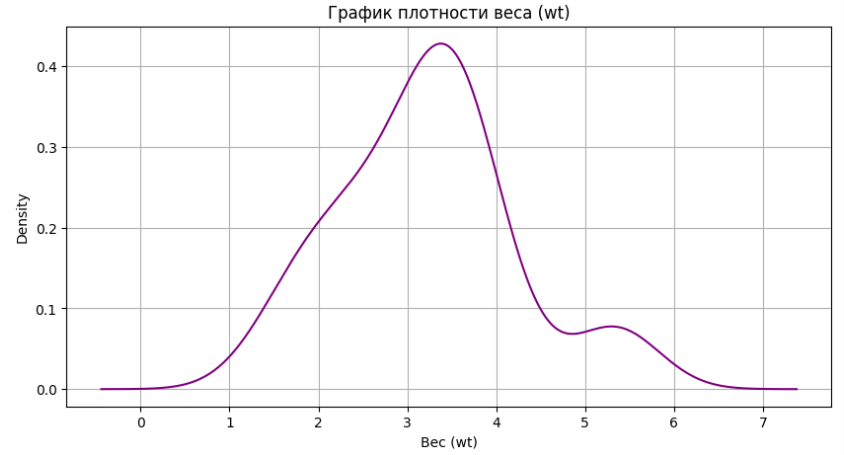

In [86]:
alt.Chart(df).transform_density(
    'wt',  # Указываем колонку, для которой строим плотность
    as_=['wt', 'density']  # Имя новых колонок для плотности
).mark_line(color='purple').encode(
    x=alt.X('wt:Q', title='Вес (wt)', scale=alt.Scale(domain=['1', '6'])),  # Ось X с диапазоном значений
    y=alt.Y('density:Q', title='Плотность')  # Ось Y с подписью
).properties(
    title='График плотности веса (wt)',
    width=600,
    height=300
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

*7. Парные зависимости

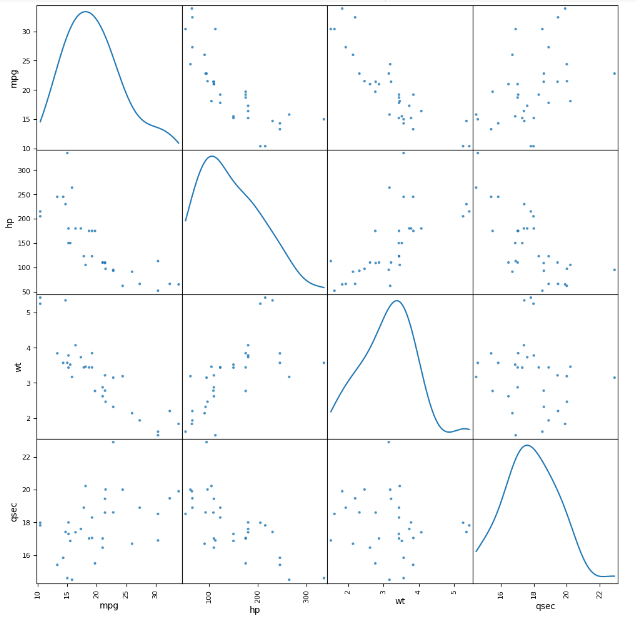

In [98]:
fields = ['mpg', 'hp', 'wt', 'qsec']

alt.Chart(df).mark_point().encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='cyl:N'
).properties(
    width=200,
    height=200
).repeat(
    row=fields,
    column=fields[::-1]
).interactive()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.RepeatChart(...)

Этот график получился намного лучше с интерактивом  🆒 🆒 🆒

*8. Столбчатая диаграмма: средний расход топлива (mpg) по числу передач (gear)*

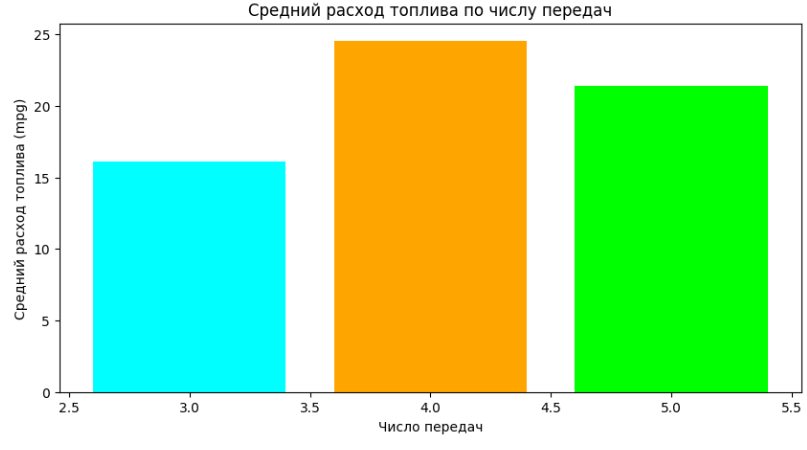

In [124]:
alt.Chart(df).mark_bar().encode(
    alt.X('gear:O', title='Число передач'),
    alt.Y('mean(mpg):Q', title='Средний расход топлива (mpg)'),
    alt.Color('gear:N', scale=alt.Scale(scheme='category10'))  # Можно выбрать цветовую палитру
).properties(
    title='Средний расход топлива по числу передач',
    width=500,
    height=500
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

*9. Линейный график: изменение мощности (hp) по порядку машин*

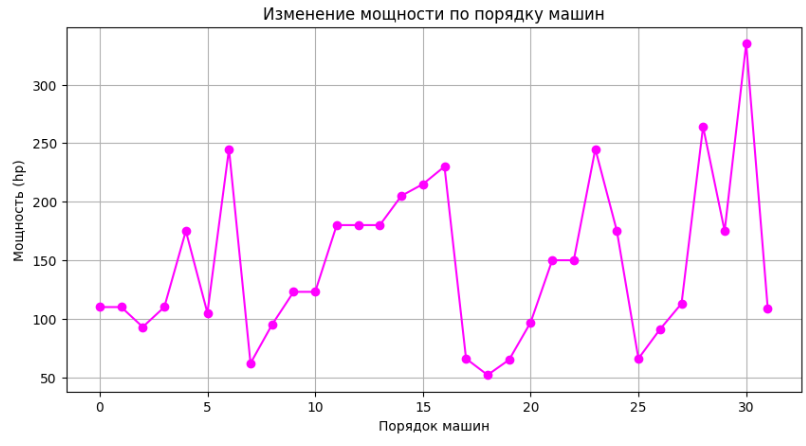

In [172]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [135]:
print(df.model[0])

Mazda RX4


In [151]:
df = df.reset_index()

In [160]:
df = df.drop('index', axis=1)

Я не смог обратиться по индексу при построении графика и мне пришлось создать доп столбец равный index

Потом я уже решил добавить создание index в

``chart = alt.Chart(df.reset_index()).mark_line(``

Возможно был какой то другой вариант обращения, но я не нашел. Вроде бы [этот способ](https://altair-viz.github.io/user_guide/data.html#including-index-data) все таки верный.

In [171]:
chart = alt.Chart(df.reset_index()).mark_line(
    color='magenta',
    strokeWidth=2
).encode(
    x=alt.X('index:O', title='Порядок машин'),
    y=alt.Y('hp:Q', title='Мощность (hp)')
)

chart1 = alt.Chart(df.reset_index()).mark_point(
    color='magenta',
    strokeWidth=2
).encode(
    x=alt.X('index:O', title='Порядок машин'),
    y=alt.Y('hp:Q', title='Мощность (hp)')
).properties(title='Изменение мощности по порядку машин')

chart+chart1

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

*10. Тепловая карта корреляций*

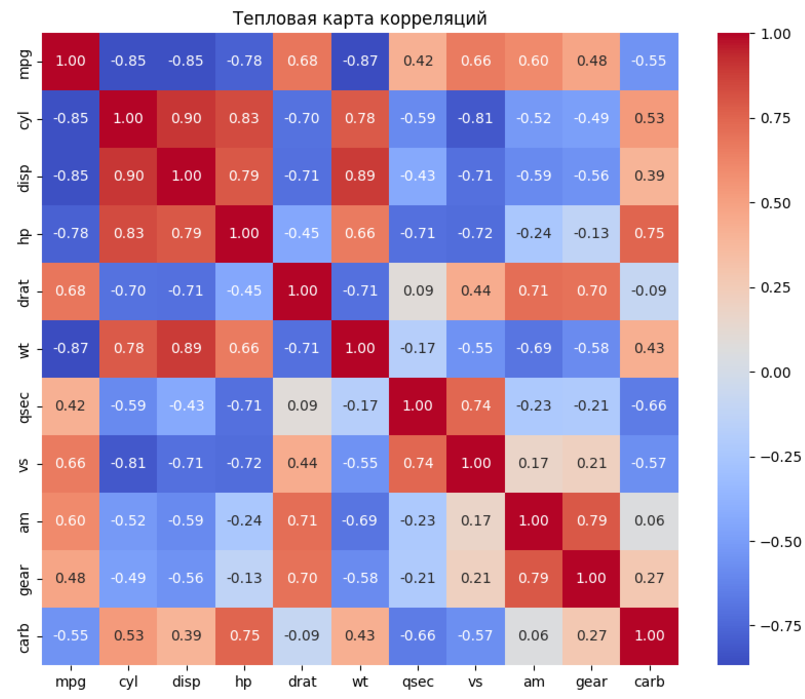

Я по всякому пытался, но тепловую карту к сожалению я не смог повторить